In [39]:
%%html
<style>body{--vscode-font-family: "D2Coding"}</style>

In [40]:
%matplotlib inline
import warnings
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import numpy as np
from scipy.special import jv, kv, jvp, kvp, jn_zeros, jnp_zeros
from scipy.optimize import fsolve, minimize

# Solving Characteristic equation of Hybrid modes

## Hybrid mode equation

$$
\left[
	\frac{J_q'(u)}{u\,J_q(u)} + \frac{K_q'(w)}{w\,K_q}
\right]
\left[
	\left(
		\frac{n_1}{n_2}
	\right)^2 
	\frac{J_q'(u)}{u\,J_q(u)} + \frac{K_q'(w)}{w\,K_q}
\right]
=
q^2
\left(
	\frac{1}{u^2}+\frac{1}{w^2}
\right) 
\left[
	\left(
		\frac{n_1}{n_2}
	\right)^2 \frac{1}{u^2}+\frac{1}{w^2}
\right]
$$

In [41]:
def gen_eigen_eq(v:float, ncore: float, nclad: float, q: int, **kwargs) -> callable:

  def jf(u):
    return jvp(q, u)/(u*jv(q,u))

  def kf(u):
    w = np.sqrt(v*v - u*u)
    return kvp(q, w)/(w*kv(q,w))

  def qf(u):
    w = np.sqrt(v*v - u*u)
    n_sq= (ncore/nclad)**2
    return q*q*(1/(u*u)+1/(w*w))*(n_sq/(u*u)+1/(w*w))
  
  def hybrid(u):
    n_sq= (ncore/nclad)**2
    return (jf(u)+kf(u))*(n_sq*jf(u)+kf(u))-qf(u)

  def lhs(u):
    return jf(u) + kf(u)

  def rhs_eh(u):
    w = np.sqrt(v*v - u*u)
    return q*(1/(u*u)+1/(w*w))
  
  def rhs_he(u):
    w = np.sqrt(v*v - u*u)
    return -q*(1/(u*u)+1/(w*w))

  if kwargs.get("mode")=="hybrid":
    return hybrid
  
  if kwargs.get("mode")=="lhs":
    return lhs

  if kwargs.get("mode")=="rhs_eh":
    return rhs_eh

  if kwargs.get("mode")=="rhs_he":
    return rhs_he

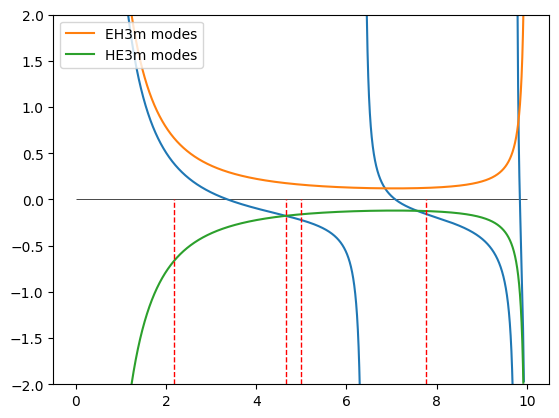

In [44]:
v = 10
q = 3
ncore = 1
nclad = 1
lhs  = gen_eigen_eq(v, ncore, nclad, q, mode="lhs")
rhs_eh = gen_eigen_eq(v, ncore, nclad, q, mode="rhs_eh")
rhs_he = gen_eigen_eq(v, ncore, nclad, q, mode="rhs_he")

fig, ax = plt.subplots()
plot_limit = 2
ax.set_ylim(-plot_limit, plot_limit)
ax.hlines(y=0, xmin=0, xmax=v, colors='k', linewidth=0.5) # plot x axis.

u = np.linspace(0.0001, v-0.0001, int(v*1000))
lhs_plot = np.where(abs(lhs(u)) >= plot_limit, None, lhs(u))
rhs_eh_plot = np.where(abs(rhs_eh(u)) >= plot_limit, None, rhs_eh(u))
rhs_he_plot = np.where(abs(rhs_he(u)) >= plot_limit, None, rhs_he(u))
ax.plot(u, lhs_plot)
ax.plot(u, rhs_eh_plot, label=f"EH{q}m modes")
ax.plot(u, rhs_he_plot, label=f"HE{q}m modes")
ax.legend(loc=2)
ax.vlines(x=[2.1845, 4.6544, 4.9966, 7.7642], ymin=-plot_limit, ymax=0, linestyles='dashed', colors='r', linewidth=1.0, label="Roots")